In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -u scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [39]:
df=pd.read_csv("/content/student_info.csv")

In [40]:
df.head()

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB


In [96]:
df.describe()

,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,study_hours
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.99300,15.999000,10.473000,75.165000,74.293000,75.150000,89.879179,2.978380
std,0.80349,0.817109,1.136029,14.304349,14.312652,14.395094,5.725007,1.167780
min,0.00000,15.000000,9.000000,50.000000,50.000000,50.000000,80.000614,1.015673
25%,0.00000,15.000000,9.000000,63.000000,62.000000,63.000000,84.971772,1.955287
50%,1.00000,16.000000,10.000000,75.000000,74.000000,75.000000,89.980889,2.962665
75%,2.00000,17.000000,12.000000,88.000000,86.000000,88.000000,94.629778,3.994360
max,2.00000,17.000000,12.000000,99.000000,99.000000,99.000000,99.954988,4.997843


In [43]:
df.isnull().sum()


,0
student_id,0
name,0
gender,0
age,0
grade_level,0
math_score,0
reading_score,0
writing_score,0
attendance_rate,0
parent_education,0


In [46]:
label_encoder=LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])


In [47]:
df.head()

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,2,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,1,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,2,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,2,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,1,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


In [51]:
df['gender'].value_counts()

,count
gender,
1,355
0,326
2,319


<Axes: xlabel='count', ylabel='final_result'>

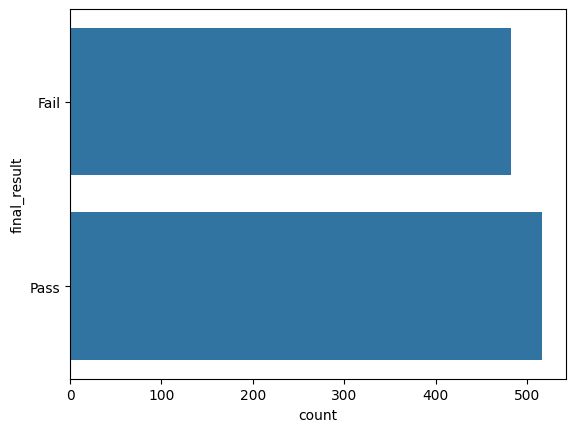

In [61]:
sns.countplot(df['final_result'])

In [98]:
x=df.drop('attendance_rate',axis=1)
y=df['attendance_rate']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
x_test[:30]

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
521,S522,Student_522,1,15,11,93,66,74,Bachelor's,3.011502,No,Standard,Yes,Pass
737,S738,Student_738,1,15,9,86,74,57,Master's,4.214774,Yes,Standard,Yes,Pass
740,S741,Student_741,0,15,10,66,87,81,PhD,3.007478,Yes,Free or reduced,No,Fail
660,S661,Student_661,2,15,10,61,50,51,Bachelor's,4.952056,Yes,Free or reduced,Yes,Fail
411,S412,Student_412,0,16,12,77,89,70,PhD,1.576960,No,Free or reduced,Yes,Pass
678,S679,Student_679,1,17,11,77,94,80,Master's,1.638665,Yes,Free or reduced,Yes,Pass
626,S627,Student_627,2,17,10,90,61,64,PhD,3.132221,Yes,Free or reduced,No,Pass
513,S514,Student_514,1,15,10,96,87,67,Master's,2.078520,Yes,Standard,No,Pass
859,S860,Student_860,1,17,9,77,88,60,PhD,3.158647,Yes,Free or reduced,Yes,Pass
136,S137,Student_137,0,15,12,68,51,71,PhD,3.104376,Yes,Standard,No,Fail
